# Similarity based Recommender Systems

This notebook implements a similarity based recommender system on a movie dataset. The outcome of this experiment is to get a set of movies which are similar to a user's choice!

Dataset: MovieLens - Movie Recommendation Data Sets http://www.grouplens.org/node/73

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

### Loading the Dataset

In [2]:
# get the user ratings
user_data = pd.read_csv('Data/u.data', sep = '\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])
user_data.head(2)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949


In [3]:
# getting the movie titles
title_data = pd.read_csv('Data/Movie_Id_Titles')
title_data.head(2)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [4]:
# Merging the datasets
movie_data = pd.merge(user_data, title_data, on = 'item_id')
movie_data.head(3)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)


### EDA

Let's explore the given movie dataset.

In [5]:
# Top 5 movies with most user ratings

ratings = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings['#ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

ratings.sort_values(by = '#ratings', ascending = False).head(5)

,rating,#ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


The table above shows the top 5 movies with maximum user ratings in descending order. The movie Star Wars(1977) tops the table with a whopping 4.36/5 Stars.

Text(0.5, 0, 'Number of user ratings')

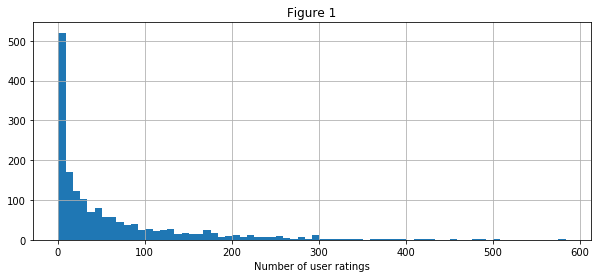

In [6]:
ratings['#ratings'].hist(bins = 70,figsize = (10,4))
plt.title('Figure 1')
plt.xlabel('Number of user ratings')

Figure 1 shows that around 500 movies are rated by 10 or few users. This will be the outliers in our dataset as we cannot relay that the movie is good based on single user ratings.

Text(0.5, 0, 'Movie rating')

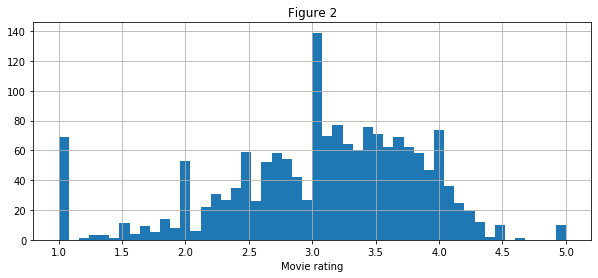

In [7]:
ratings['rating'].hist(bins = 50,figsize = (10,4))
plt.title('Figure 2')
plt.xlabel('Movie rating')

Figure 2 shows that on an average, the movies are rated somewhere in between 3 and 4 stars. Also, the peaks at 1.0 and 5.0 are the outliers (movies seen by a single users)

### Recommending Similar Movies

Let's create a simple recommender system that provides the movies similar to "Air Force One" (movie of my choice).

In [8]:
# Creating a movie matrix

movie_mat = pd.pivot_table(data = movie_data, index = 'user_id', columns = 'title', values = 'rating')
movie_mat.head(5)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's obvious to have NaN values as not all users have watched all the listed movies.  
Lets see if I have the movie "Air Force One" in the title.

In [9]:
ratings.loc['Air Force One (1997)'] # yes i have it!!!

rating        3.63109
#ratings    431.00000
Name: Air Force One (1997), dtype: float64

In [10]:
# Grab the user ratings of 'Air Force One' (afo for short) 
afo_user_ratings = movie_mat['Air Force One (1997)']

similar_to_afo = movie_mat.corrwith(afo_user_ratings) # corelate with all columns of movie matrix

corr_afo = pd.DataFrame(similar_to_afo, columns = ['Correlation'])
corr_afo.dropna(inplace = True) # we don't need the null values

/home/supriya/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/supriya/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [11]:
# Lets also consider the number of user ratings before recommending similar movies

corr_afo = corr_afo.join(ratings['#ratings'])
corr_afo.head(5)

,Correlation,#ratings
title,,
'Til There Was You (1997),0.867722,9
101 Dalmatians (1996),0.221943,109
12 Angry Men (1957),0.228031,125
187 (1997),0.294232,41
2 Days in the Valley (1996),0.043847,93


Let's filter out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier Figure 1).

In [12]:
corr_afo[corr_afo['#ratings'] > 100].sort_values(by = 'Correlation', ascending = False).head(10)

,Correlation,#ratings
title,,
Air Force One (1997),1.000000,431
"Hunt for Red October, The (1990)",0.554383,227
"Firm, The (1993)",0.526743,151
Murder at 1600 (1997),0.514906,218
Eraser (1996),0.500606,206
Absolute Power (1997),0.497411,127
"Rock, The (1996)",0.493542,378
"Long Kiss Goodnight, The (1996)",0.490233,185
Crimson Tide (1995),0.481205,154


**Table above provides the top 10 movies which are similar to the movie of my choice 'Air Force One'. 